ПУНКТ 1

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
#2.1
loc, scale, N = 3, 2, 10000
s = np.random.logistic(loc, scale, N)

----
----
----
----
----

ПУНКТ 2

In [53]:
min_s = min(s)
max_s = max(s)
mean_s = s.mean()
uncorrect_variance = np.var(s, ddof = 0) #неисправленная дисперсия
correct_variance = np.var(s, ddof = 1)   #исправленная дисперсия
standart_deviation = np.std(s, ddof = 1)  # или просто извлечь корень из correct_variance (среднеквадр отклонение)

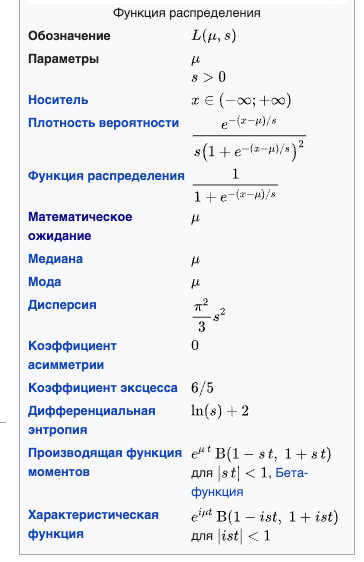

In [54]:
print('Минимальное значение выборки: ', min_s)
print('Максимальное значение выборки: ', max_s)
print('Выборочное среденее: ', mean_s)
print('Выборочная (неисправленная) дисперсия: ',  uncorrect_variance)
print('Выборочная (исправленная) дисперсия: ',  correct_variance)
print('Среднеквадратическое от исправленной дисперсии: ', standart_deviation)

Минимальное значение выборки:  -18.28565224949102
Максимальное значение выборки:  21.502850739102378
Выборочное среденее:  2.976825334567524
Выборочная (неисправленная) дисперсия:  13.137887525778908
Выборочная (исправленная) дисперсия:  13.139201445923499
Среднеквадратическое от исправленной дисперсии:  3.6248036423954746


-------------------------------------------------------------------------------------------------------------------

Письменный расчет мат ожидания и дисперсии
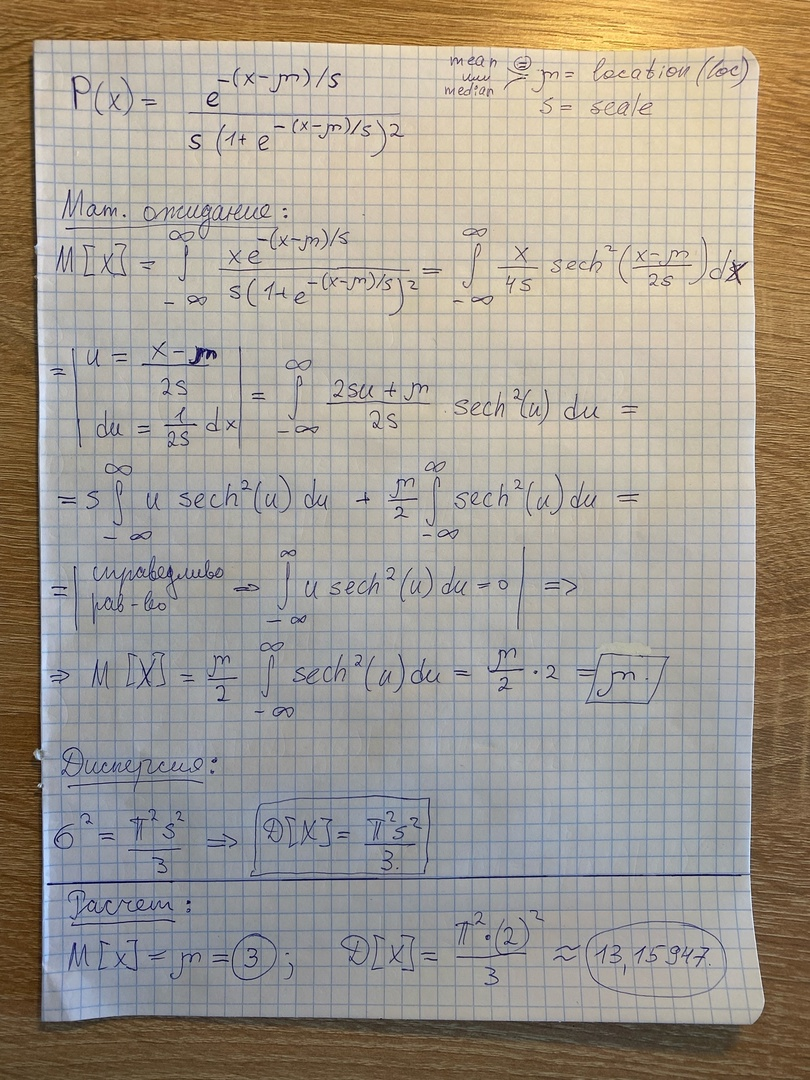

In [55]:
#пункт 2.3
def analysis(n):
    l, s, n = 3, 2, n
    array = np.random.logistic(l, s, n)
    mean_s = array.mean()                         # выборочное среднее
    correct_variance = np.var(array, ddof = 1)    #исправленная дисперсия
    return [array, mean_s, correct_variance]

In [56]:
def create_frame(n):
    frame = [analysis(n) for i in range(1000)]                        # сгенерировали 1000 выборок по n элементов
#    print(len(frame[0][0]))
    table_dict = {"array": [frame[i][0] for i in range(1000)],
                 "mean": [frame[i][1] for i in range(1000)],
                 "variance": [frame[i][2] for i in range(1000)]}
    df = pd.DataFrame(table_dict)
    return df

In [57]:
# построение графиков
def draw_graph(data_frame):
    theoretical_mean = 3  # Математическое ожидание
    theoretical_variance = (np.pi**2 * 2**2) / 3  # Дисперсия 

    # Построение графиков
    plt.figure(figsize=(20, 10))     # задает размер графика (ширина, длина)

    # График выборочного среднего
    plt.plot(data_frame['mean'], label='Выборочное среднее')
    plt.axhline(theoretical_mean, color='red', linestyle='-', label='Теоретическое среднее', linewidth = 5)
    plt.xlabel('Номер реализации', fontsize = 15)
    plt.ylabel('Выборочное среднее', fontsize = 15)
    plt.legend()



    # График исправленной выборочной дисперсии
    plt.figure(figsize=(20, 10))     # задает размер графика (ширина, длина)
    plt.plot(data_frame['variance'], label='Исправленная выборочная дисперсия')
    plt.axhline(theoretical_variance, color='red', linestyle='-', label='Теоретическая дисперсия', linewidth = 5)
    plt.xlabel('Номер реализации', fontsize = 20)
    plt.ylabel('Исправленная выборочная дисперсия', fontsize = 20)
    plt.legend()

    plt.tight_layout()
    plt.show()


--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ПОСТРОЕНИЕ ДЛЯ N = 10

                                                 array      mean   variance
0    [4.337402137049128, -1.2306073571161074, 2.135...  1.632159  13.841301
1    [6.559747158880452, 1.552119576045627, -1.9477...  3.003659   7.755279
2    [5.320476363958785, 1.1782797112436811, 3.8415...  1.919028  16.017139
3    [0.44759784401456937, 2.4083962344931886, 9.43...  4.165383  15.870522
4    [1.8397883261310013, 1.448625939432847, 4.6071...  3.677041   9.545604
..                                                 ...       ...        ...
995  [8.566322898141383, 2.0648356241765806, -0.151...  2.256857   9.799018
996  [3.0014202904499716, 2.274911323983863, 5.0774...  4.698593  19.600859
997  [-2.588789605093324, 4.298353706473775, 5.2700...  2.903189  29.837404
998  [4.0027881942844585, 5.35317004342585, 2.30463...  2.219093   3.946332
999  [3.168028794610869, 0.49183764202343694, 5.624...  3.136366   3.801585

[1000 rows x 3 columns]


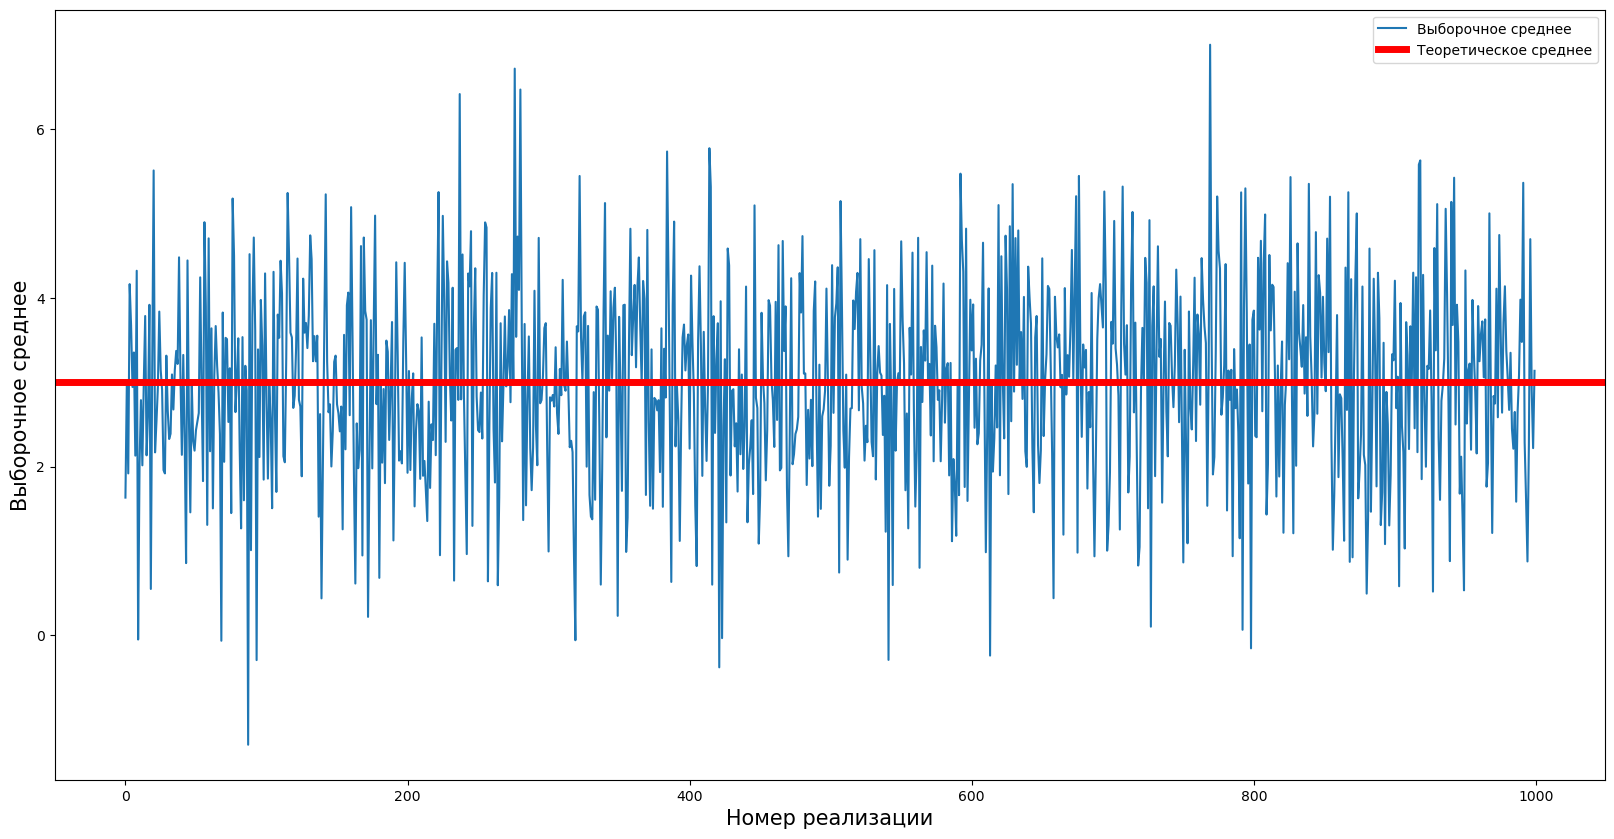

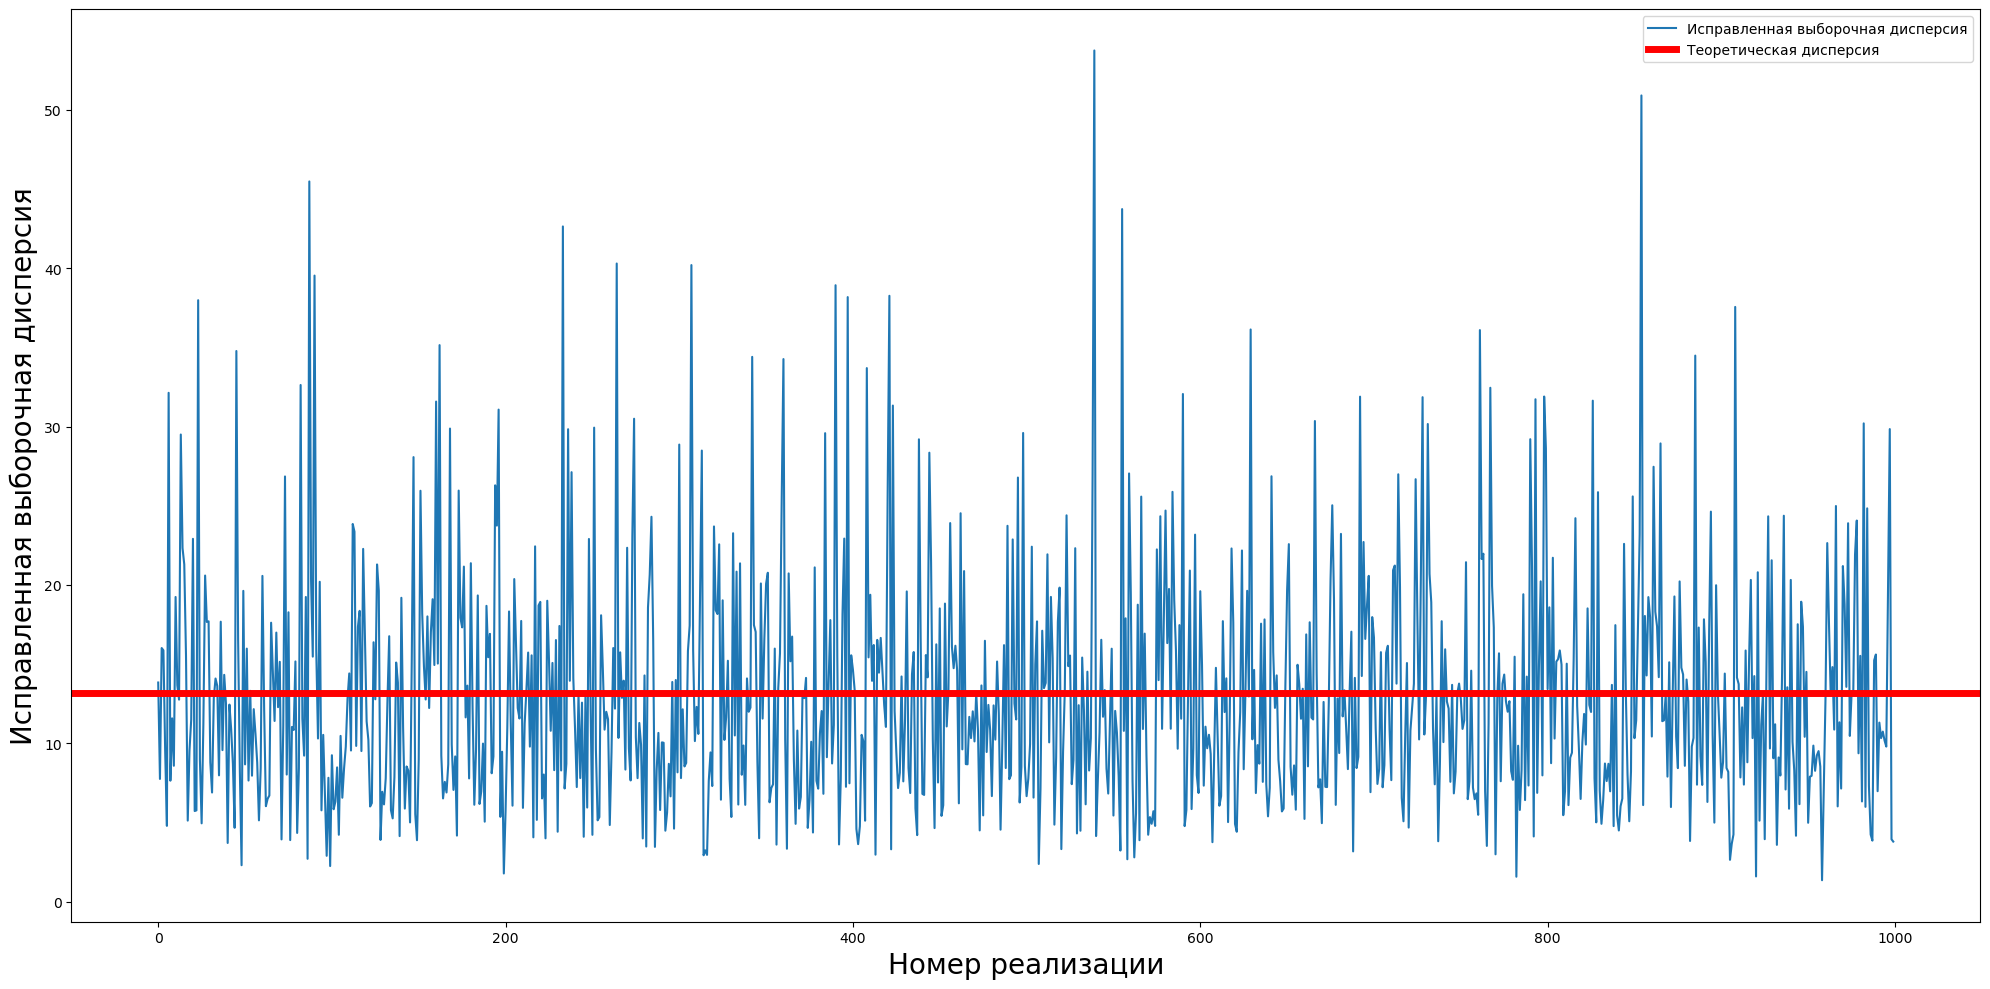

In [58]:
df_10 = create_frame(10)
print(df_10)
draw_graph(df_10)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

ПОСТРОЕНИЕ ДЛЯ N = 50

In [59]:
df_50 = create_frame(50)
print(df_50)

                                                 array      mean   variance
0    [-3.4605390265402125, 4.710106690902117, 2.052...  2.977836  12.914786
1    [8.763749091565987, -3.132111811974106, 4.0303...  2.968542  15.383906
2    [8.408924467426083, -2.265149188366154, 5.5773...  3.354893  16.122187
3    [1.5785882586120905, 0.1778490985739274, 5.742...  2.076724  13.085327
4    [8.071664161900513, 4.781838056819662, -0.1432...  3.455878  21.911493
..                                                 ...       ...        ...
995  [1.358885093026256, -1.3901691776183656, 1.560...  2.305879  12.554314
996  [3.2610185201132387, 1.4350302511748432, 3.973...  3.552997  20.000313
997  [0.26399706903040254, -5.790863427413999, 2.19...  4.052472  17.527297
998  [-2.4540122074998676, 3.2410255872419906, 3.89...  3.653676  11.527402
999  [-3.8111337526925553, 6.127679932308977, 3.766...  3.343941  13.659514

[1000 rows x 3 columns]


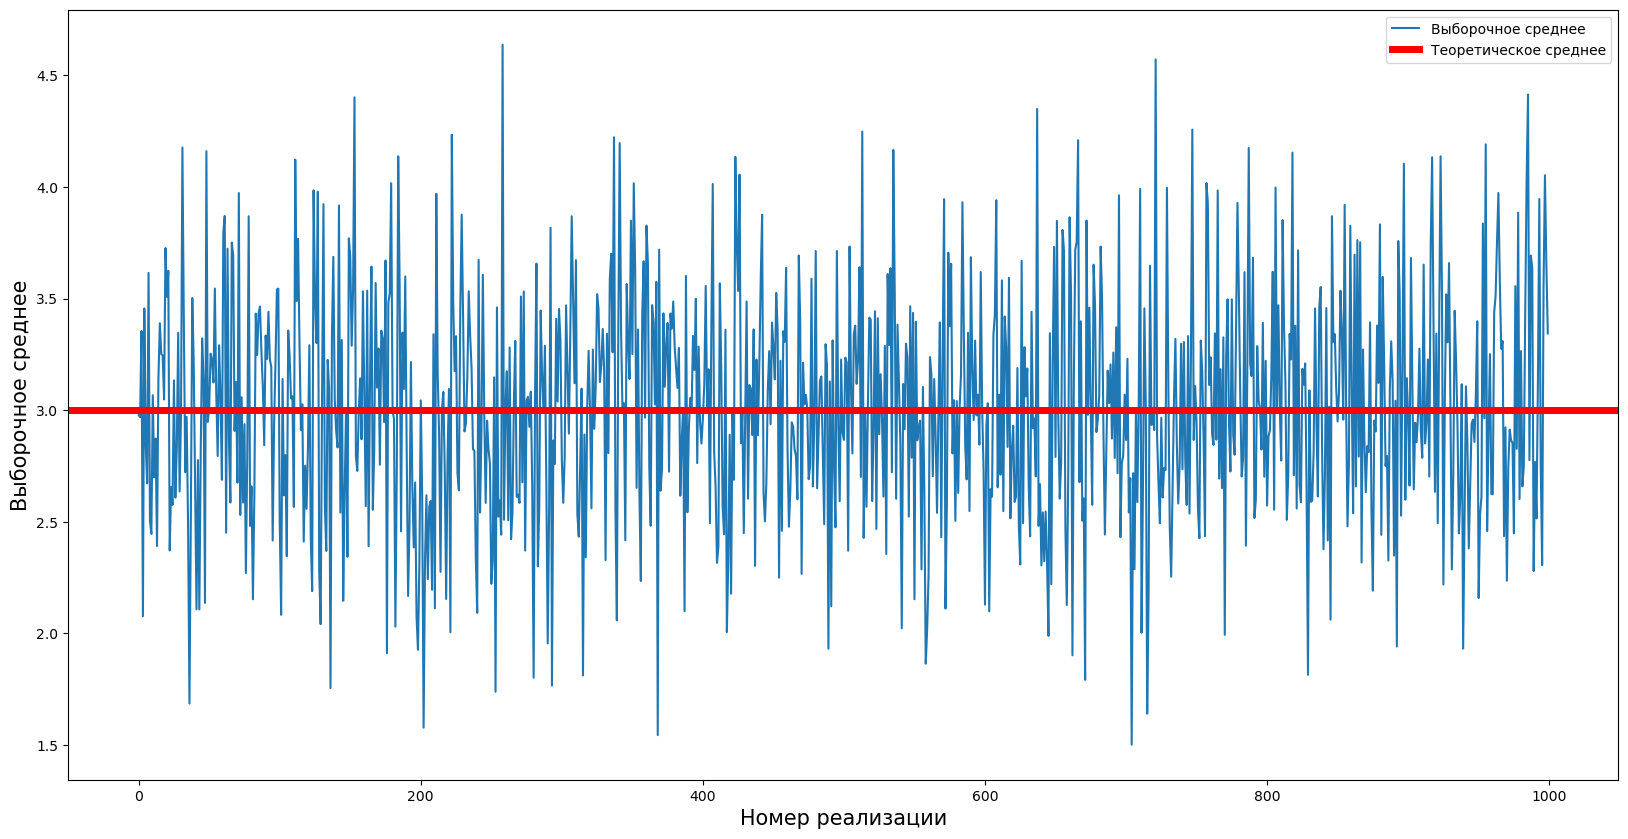

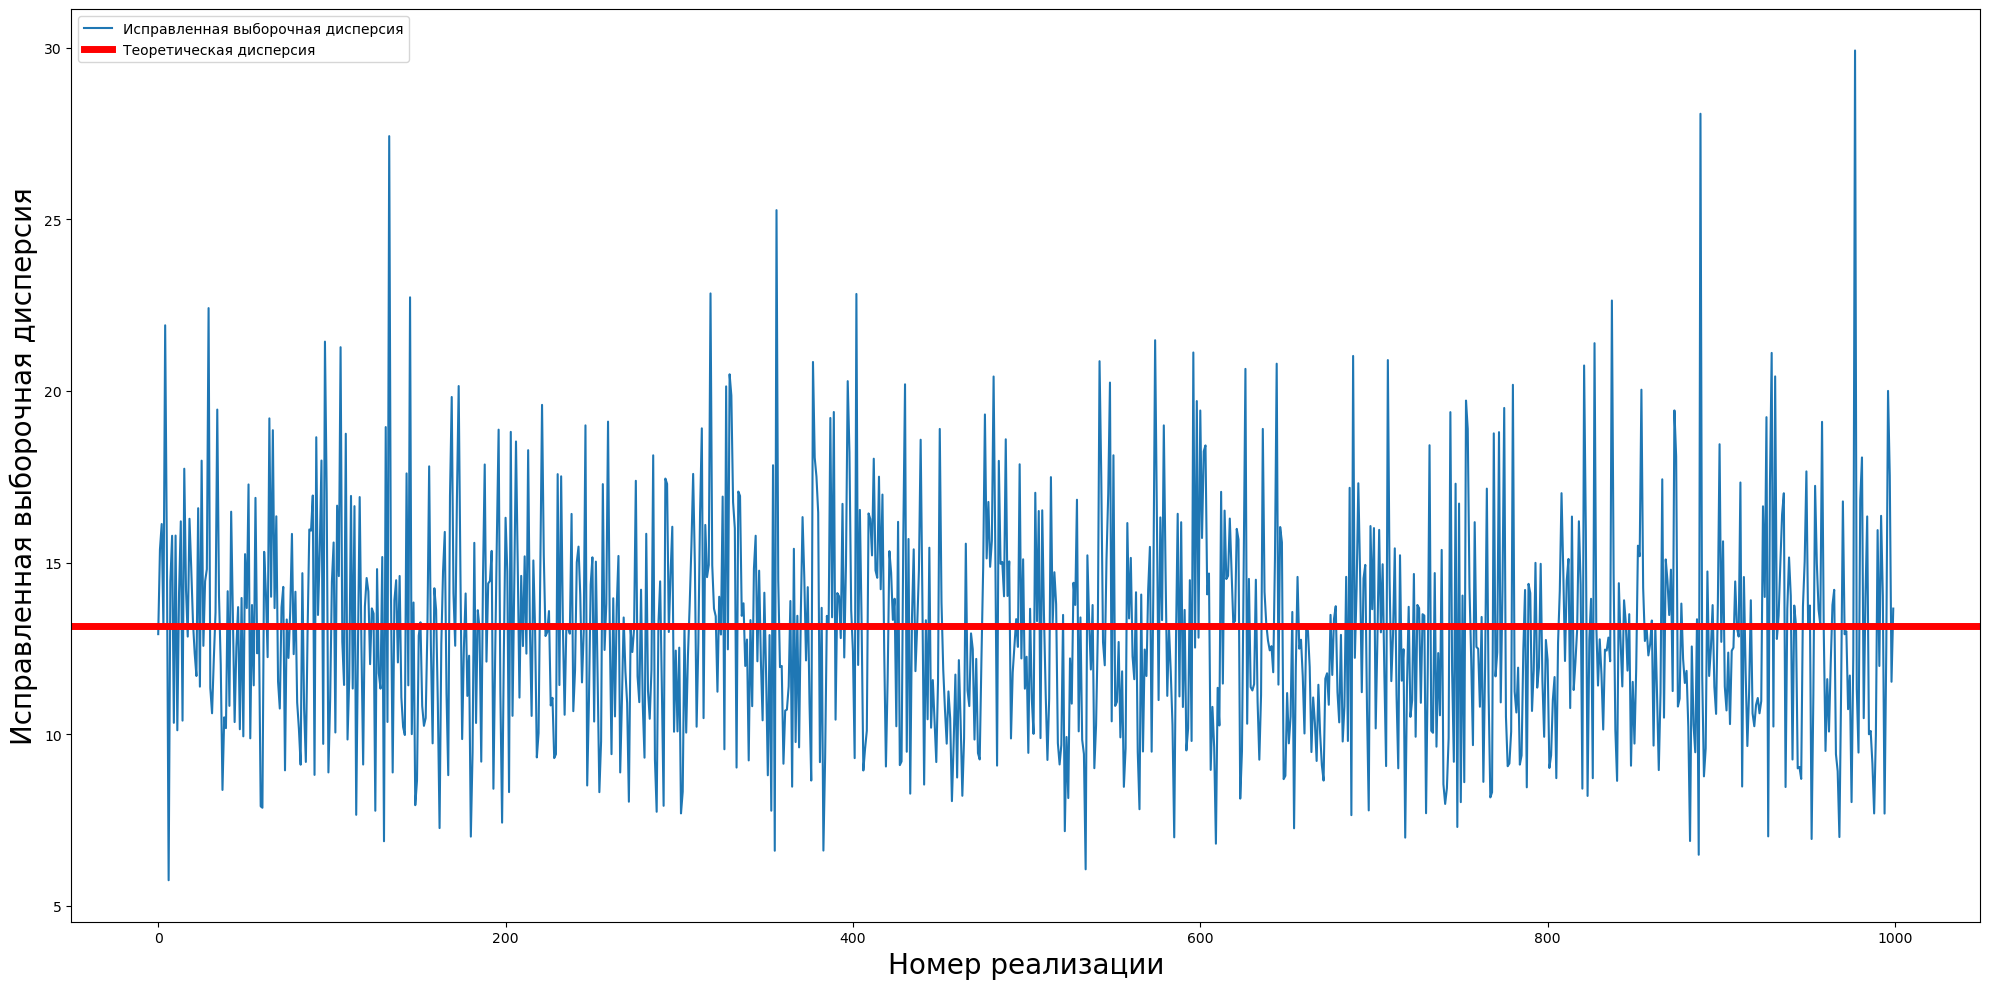

In [60]:
draw_graph(df_50)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

ПОСТРОЕНИЕ ДЛЯ N = 100

In [61]:
df_100 = create_frame(100)
print(df_100)

                                                 array      mean   variance
0    [4.414165545401257, 1.2021180358380383, 2.2290...  2.864031  13.391459
1    [2.9400086875122406, 3.0429715163651205, 2.429...  2.801081  12.685572
2    [4.773795021447301, 2.1659319137195574, 11.327...  3.852573  11.141267
3    [1.6426552146413618, 5.8556311329611255, 2.890...  2.781394  16.045572
4    [0.151925148843866, 4.751386245335098, 3.41186...  3.170783  14.563001
..                                                 ...       ...        ...
995  [4.142063976858694, 10.538934288384326, 3.9941...  2.827635  11.551828
996  [1.1359241521558712, 4.305003033412606, 7.4082...  3.418104  13.790308
997  [-0.8870450144844, 3.5874524987082794, 3.99678...  2.826910  11.522113
998  [1.1392672385062153, -1.3634508263228273, -0.8...  2.988529  16.846220
999  [1.662214041428646, -3.5253237155882946, 7.679...  2.955382  10.376452

[1000 rows x 3 columns]


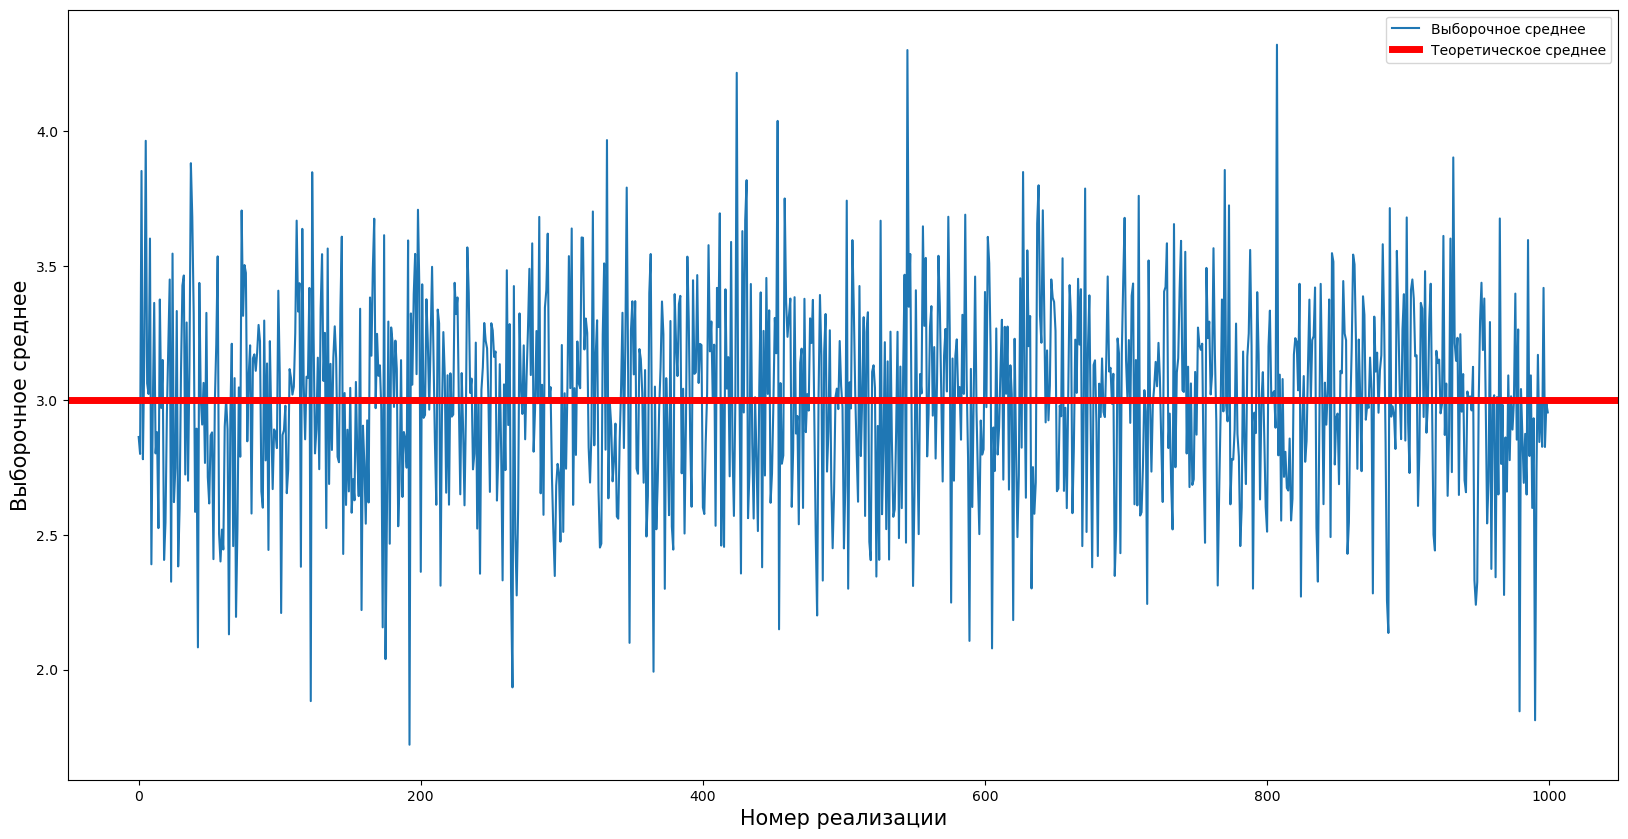

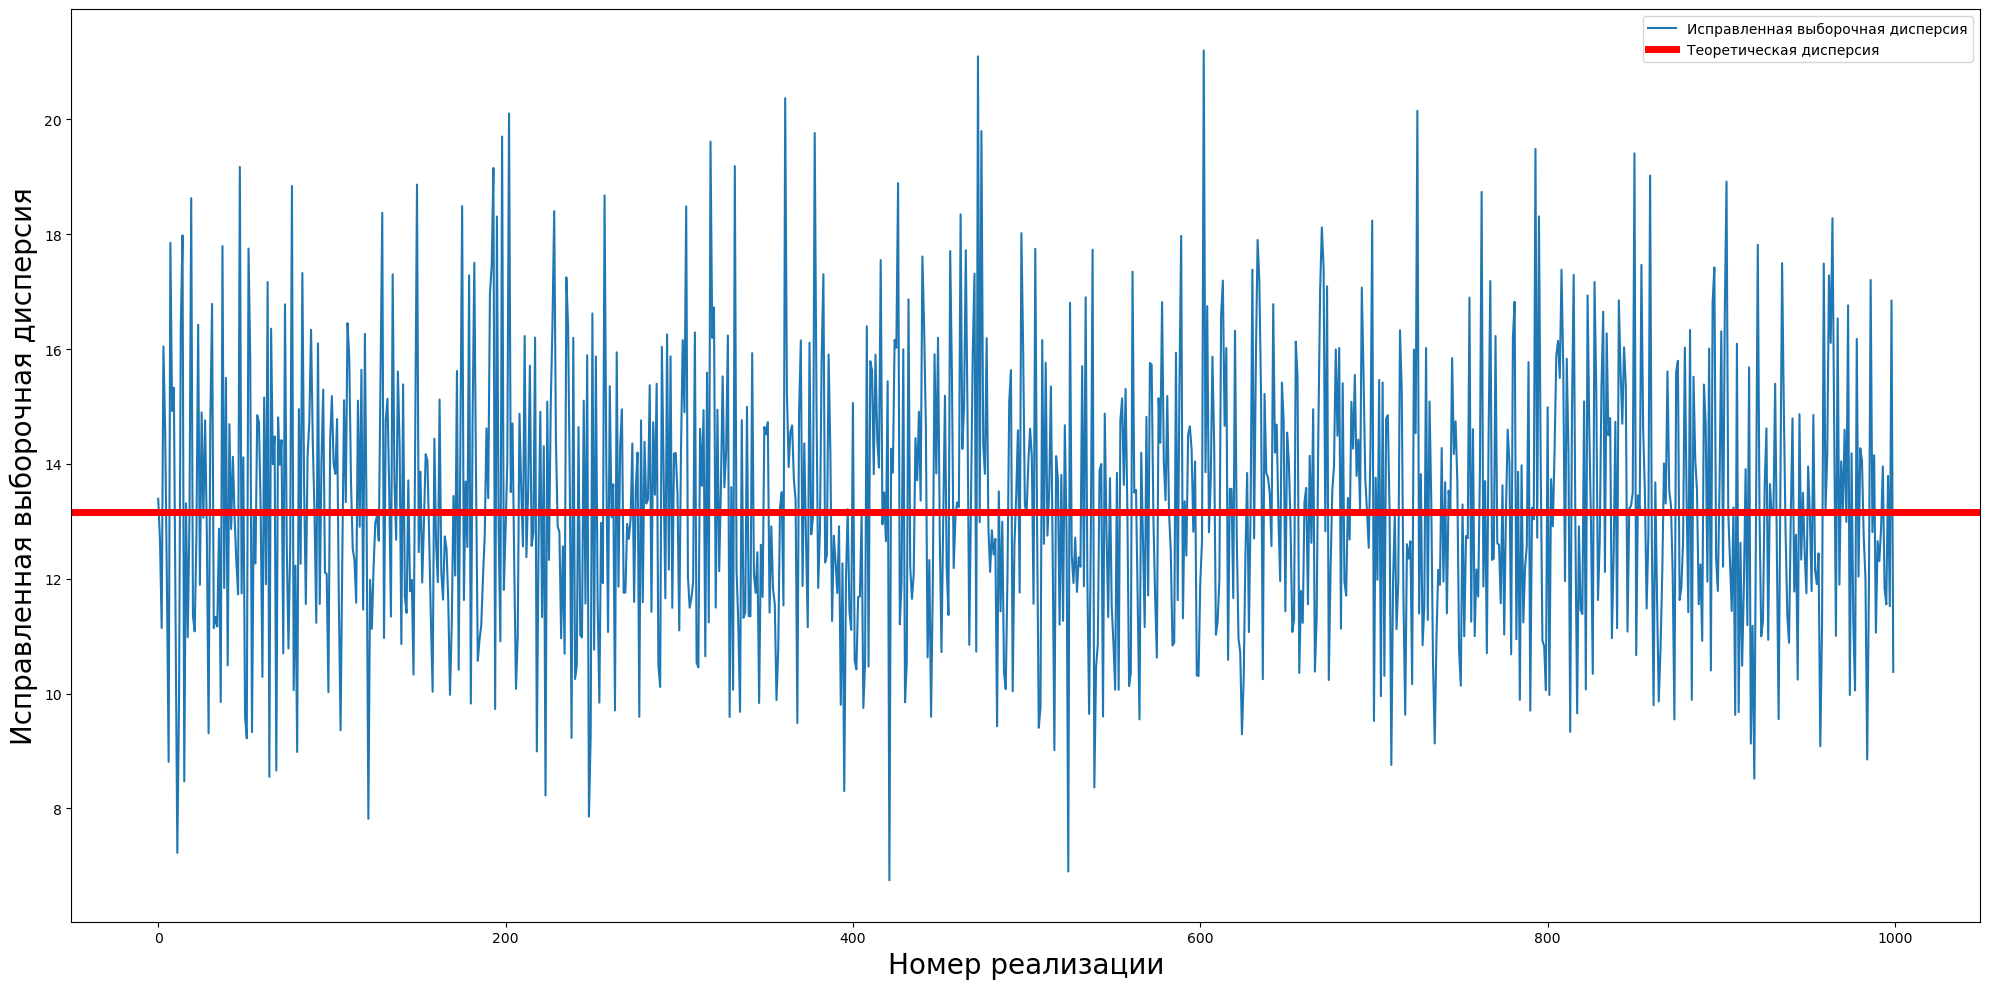

In [62]:
draw_graph(df_100)

-------
-------

Для N = 10000

In [63]:
df_10000 = create_frame(10000)
print(df_10000)

                                                 array      mean   variance
0    [3.4965513559710706, 15.268288308243664, 3.151...  3.065385  13.283400
1    [4.11295165923563, -4.1166568350601285, 5.4104...  2.964760  13.282531
2    [7.4968595630789885, 6.102162072799505, 3.4193...  2.961205  12.782121
3    [-0.7903413950273075, 3.5937434634657817, 3.67...  2.986043  13.317235
4    [3.3992458081176555, 4.138323261111206, -0.034...  2.938496  13.391731
..                                                 ...       ...        ...
995  [-0.05593979381759917, 2.197716351307678, 0.85...  2.957415  13.473655
996  [7.026320989498673, -0.8821631582983605, 5.746...  3.033024  13.036323
997  [3.8355212588181704, 2.4500919474862473, -0.20...  2.983608  13.382536
998  [4.383960055736791, 0.5209026996675687, 2.3687...  3.006849  12.957475
999  [2.957362478008408, 5.68979472011803, 9.195843...  2.994034  12.925151

[1000 rows x 3 columns]


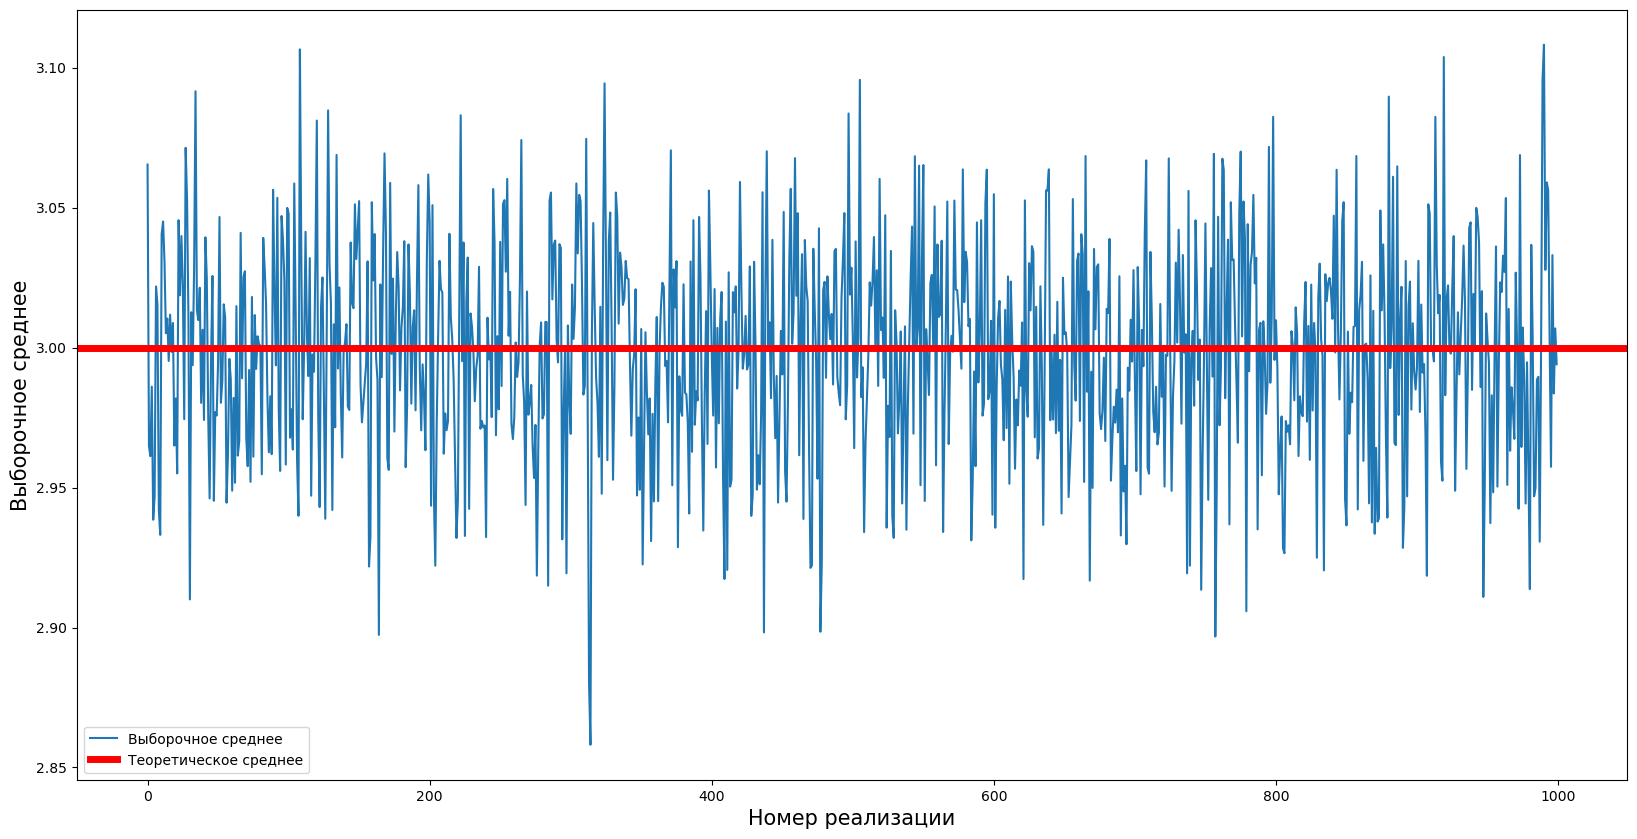

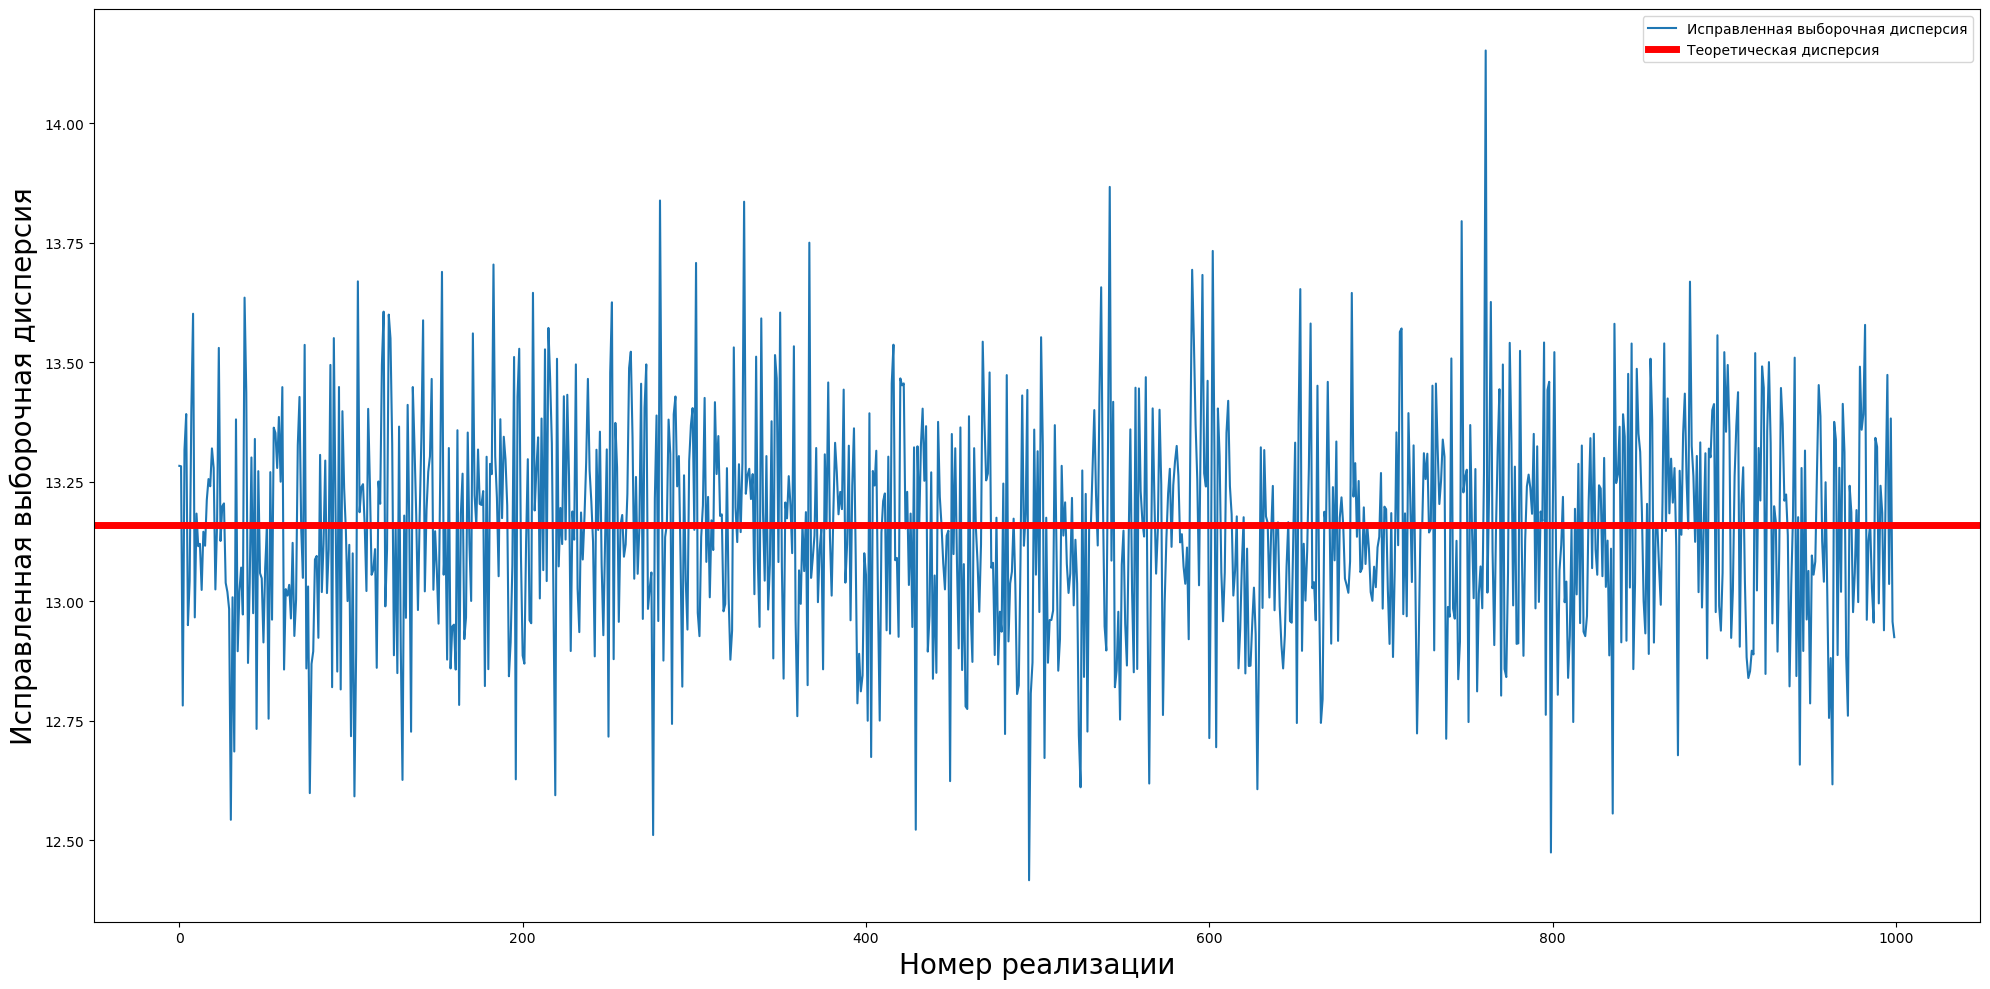

In [64]:
draw_graph(df_10000)

ВЫВОД: при увеличении объема выборки(при увеличении N) мат ожидание и дисперсия стремятся к вычисленным вручную значениям (колебания от вычисленной величины начинают уменьшаться) (смотреть внимательно на ось Oy)


-------
------



In [65]:
#Пункт 2.4

df = create_frame(10000)
average_from_mean = df['mean'].mean()
average_from_variance = df['variance'].mean()

print("Среднее от выборочного среднего: ", average_from_mean)
print("Среднее оn исправленной выборочной дисперсии: ", average_from_variance)


Среднее от выборочного среднего:  2.9992941179412154
Среднее оn исправленной выборочной дисперсии:  13.160385768177962


ВЫВОД: Значения близки друг к другу (и близки к значениям вычисленным вручную)

-----
-----
-----
-----
-----

ПУНКТ 3
(работа с выборкой из пункта 1)

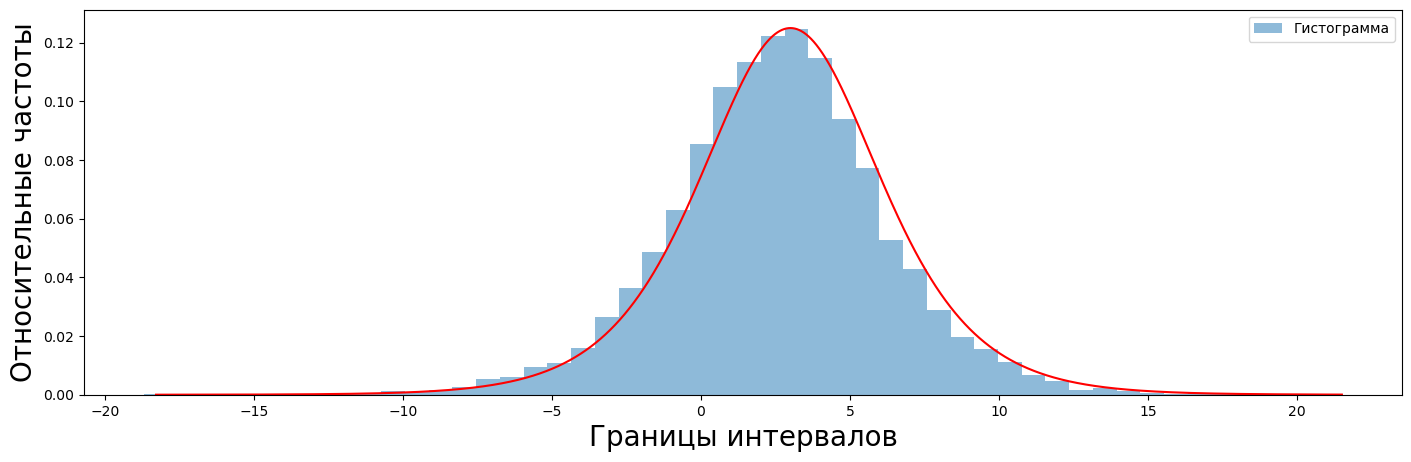

In [66]:
from scipy.stats import logistic

#r = 1 + int(np.log2(10000))                   
r = 50

h = (max_s - min_s)/r
interval_boundaries = np.linspace(min_s, max_s, r+1)

#в interval_boundaries сгенерили просто r+1 число
#потом по ним в np.histogram разбили на r+1 интервалов
hist_counts, _ = np.histogram(s, bins = interval_boundaries)  
# his_count - массив, в котором хранится кол-во вхождений в элементов интеравал 
# _ - это массив границ

relative_frequencies = hist_counts / (h * 10000)

plt.figure(figsize=(17, 5))
plt.bar(interval_boundaries[:-1], relative_frequencies, width=h, alpha=0.5, label='Гистограмма')
plt.xlabel('Границы интервалов', fontsize = 20)
plt.ylabel('Относительные частоты', fontsize = 20)
plt.legend()

s_theoretical = np.linspace(min_s, max_s, 10000)
pdf_logistic = logistic.pdf(s_theoretical, loc, scale) # посчитали значения плотности вероятности для каждого значения из выборки
plt.plot(s_theoretical, pdf_logistic, 'r-', label='Логистическое распределение')
#s_theoretical - значения по 0x
#pdf_logistic - значения по 0y

plt.show()

-----
-----
-----

ПУНКТ 4

In [67]:
grouped_mean = np.sum((interval_boundaries[:-1] + interval_boundaries[1:]) * 0.5 * hist_counts) / len(s_theoretical)
print(len(interval_boundaries[:-1] + interval_boundaries[1:]))


# PYTHON ARRAYS
# a = [1, 2, 3] 
# b = [4, 5, 6]
# a + b = [1, 2, 3, 4, 5, 6]
# 2 * a = [1, 2, 3, 1, 2, 3]


#NUMPY ARRAYS
# A = [1, 2, 3]
# B = [4, 5, 6]

# A+B:  [5 7 9]
# 2*A:  [2 4 6]

# Вычисление выборочной дисперсии по группированным данным
grouped_variance = np.sum(((interval_boundaries[:-1] + interval_boundaries[1:]) * 0.5 - grouped_mean)**2 * hist_counts) / (len(s_theoretical) - 1)
print("Выборочное среднее для группированных данных: ", grouped_mean)
print("Выборочная дисперсия для группированных данных: ",grouped_variance)
print("----------------------------")
print("Выборочные характеристки из пункта 2")
print('Выборочное среденее: ', mean_s)
print('Выборочная (исправленная) дисперсия: ',  correct_variance)


50
Выборочное среднее для группированных данных:  2.97819909467904
Выборочная дисперсия для группированных данных:  13.23005127082455
----------------------------
Выборочные характеристки из пункта 2
Выборочное среденее:  2.976825334567524
Выборочная (исправленная) дисперсия:  13.139201445923499


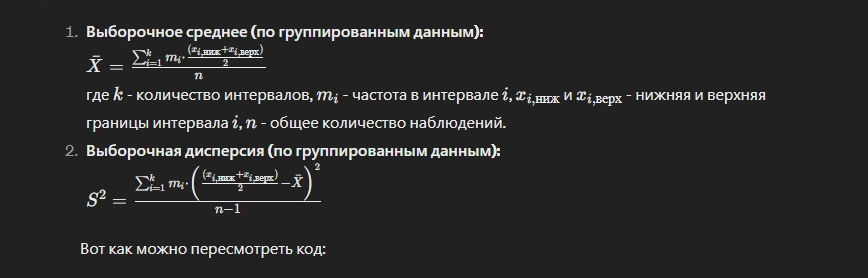
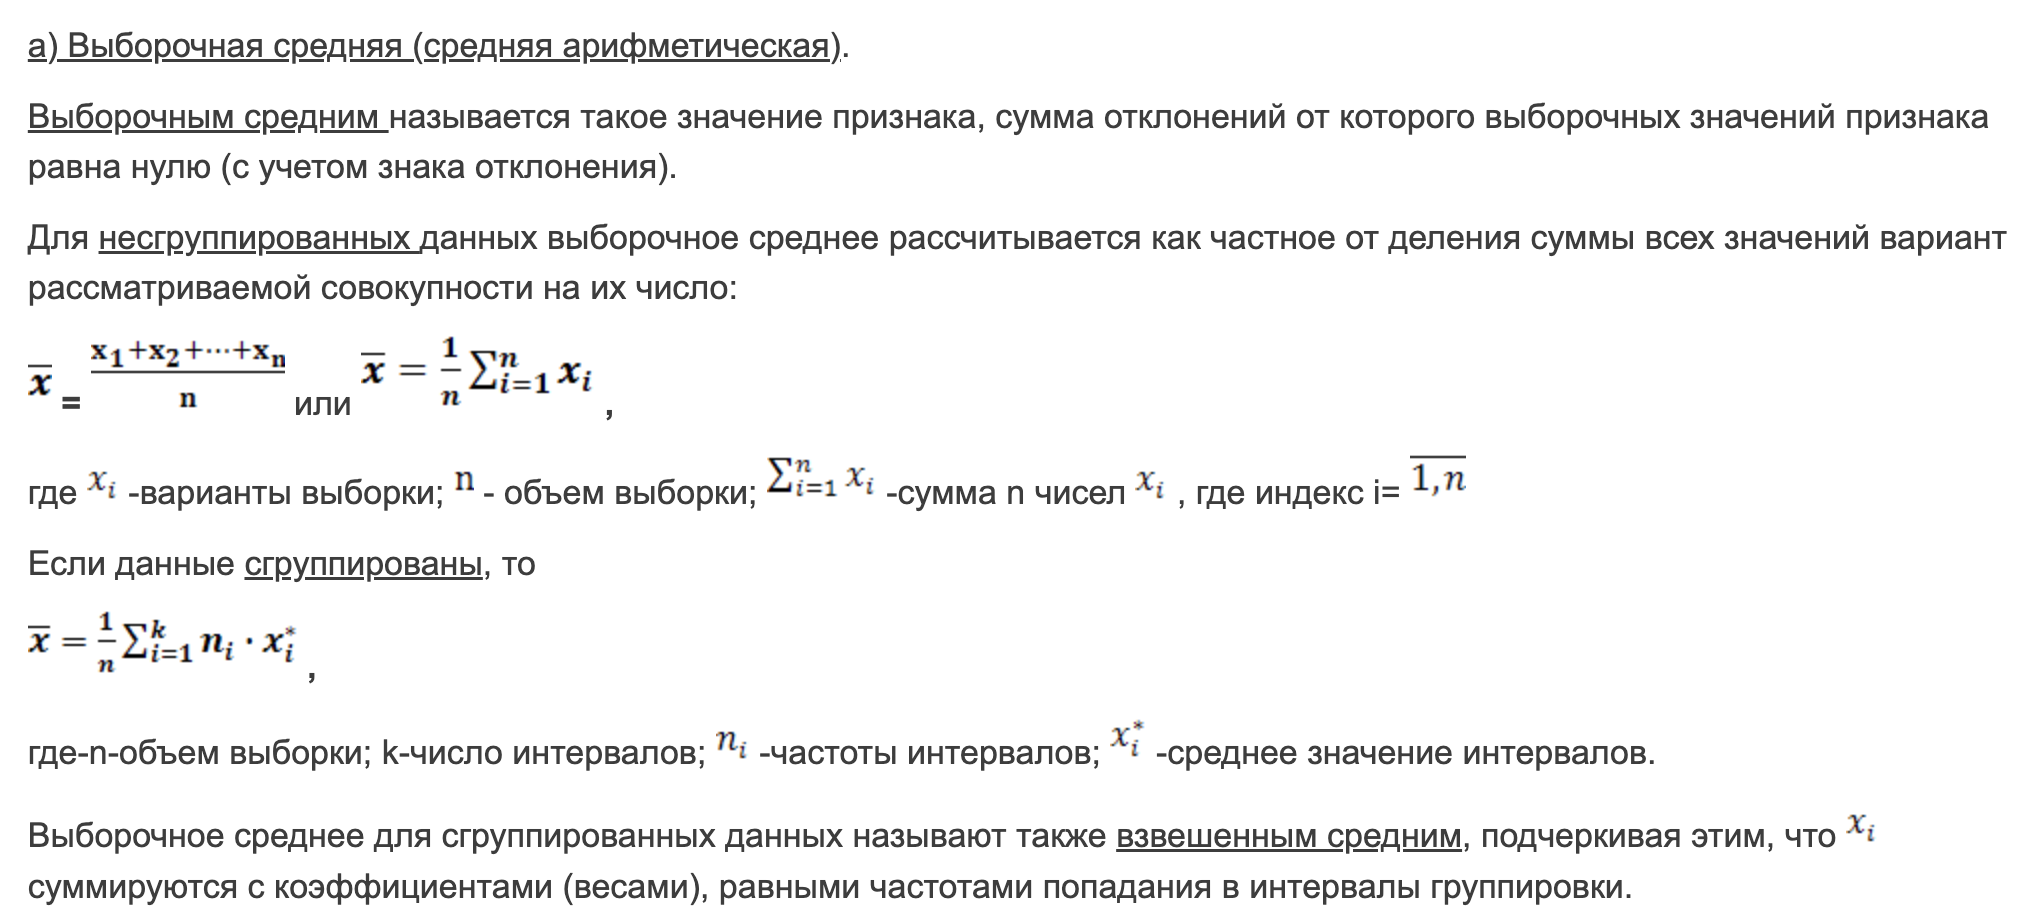


----
----
----

ПУНКТ 5

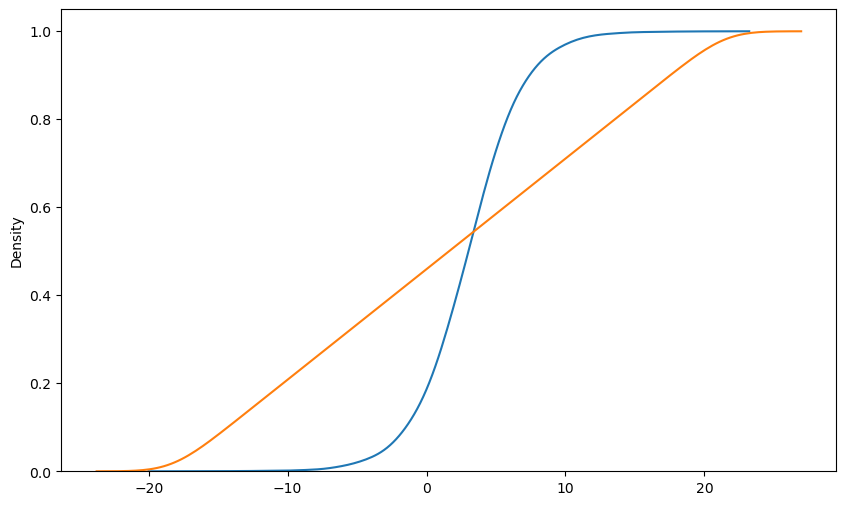

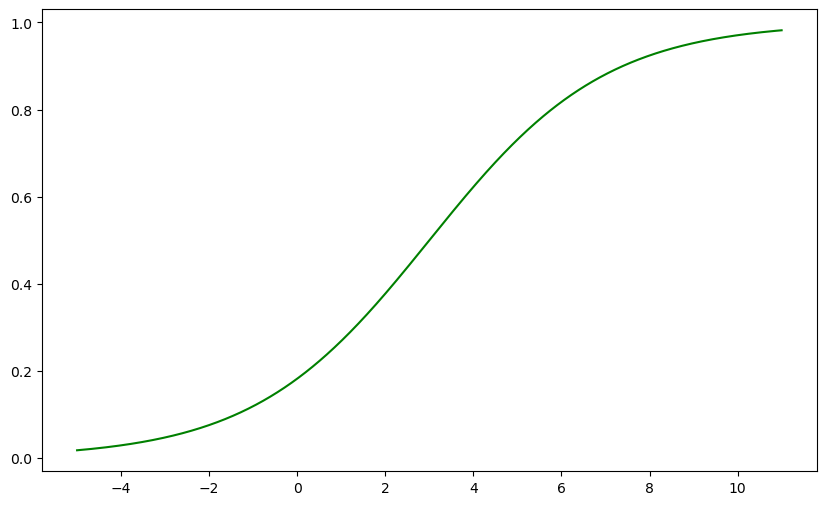

In [70]:
plt.figure(figsize=(10, 6))
#Эмпирическая функция для груп/негруп данных
import seaborn as sns
sns.kdeplot(s, cumulative=True)
sns.kdeplot(s_theoretical, cumulative=True)



# Параметры распределения
loc, scale = 3, 2

# Создание массива значений для x
x_theoretical = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)

# Рассчет теоретической функции распределения
cdf_theoretical = logistic.cdf(x_theoretical, loc=loc, scale=scale)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_theoretical, cdf_theoretical, label='Теоретическая функция распределения', color='green')


---
---
---
ТЕСТИРОВАНИЕ

In [72]:

a = [1, 2, 3]
b = [4, 5, 6]
print("python")
print("a+b: ", a + b)
print("2*a: ", 2 * a)
print("-----------")
print("numpy")
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print("A+B: ", A + B)
print("2*A: ", 2 * A)

python
a+b:  [1, 2, 3, 4, 5, 6]
2*a:  [1, 2, 3, 1, 2, 3]
-----------
numpy
A+B:  [5 7 9]
2*A:  [2 4 6]
